<a href="https://colab.research.google.com/github/nralibera/PAr_135/blob/main/fault_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install --upgrade google-api-python-client

# Current stable release for CPU and GPU
#UNCOMMENT THE LINE BELOW IF TENSORFLOW NOT INSTALLED
#!pip install tensorflow


In [2]:
import numpy as np
import random as rd
from tqdm import tqdm

## **I. Data construction for model training:**
We want two arrays: the first `matrix_data` containing the matrices 3D with shape=(n,m,p) and the second `label` containing the faults (permanent or intermittent without distinction) which correspond to the matrices 1D with shape=(p). For example, the matrix `matrix_data(:,:,15)` corresponds to the fault of class `label(15)`.

In [3]:
#Linking drive with the notebook if you use google colab (Put True)
google_colab = False
if google_colab :
    from google.colab import drive
    drive.mount('/content/drive')

In [4]:
 #Load Data

data=np.load("/Users/nanto/OneDrive/Bureau/ECL/Machine Learning/PAr_135/Files/trainset.npz")

x_train = np.moveaxis(data['x_train'],2,0)
y_train = data["y_train"]

x_test = np.moveaxis(data['x_test'],2,0)
y_test = data["y_test"]  


In [14]:
print(x_train.shape,x_test.shape)

(131264, 55, 108) (33009, 55, 108)


## **II. Data vizualisation:**
In this first attempt, we use a neural network especially a Convolutional Neural Network (CNN). This idea comes from the fact that the input matrix `matrix_data` reminds a matrix of a white and black image. Thus, CNN can be a model to handle the problem. 

In [6]:

import tensorflow as tf 
import matplotlib.pyplot as plt

[ 46278  94334  56571 113933]


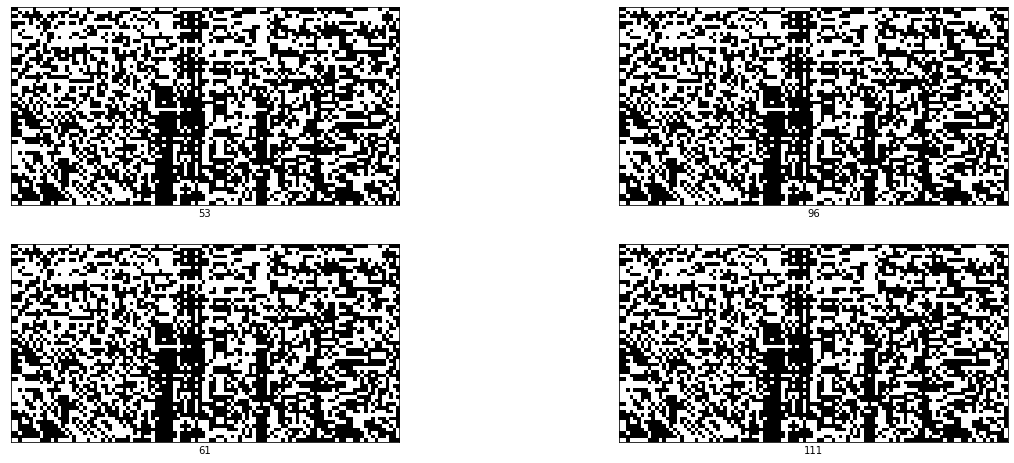

In [7]:
plt.figure(figsize=(20,8))
random_inds = np.random.choice(x_train.shape[0],4)
print(random_inds)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(x_train[image_ind,:,:]), cmap=plt.cm.binary)
    plt.xlabel(y_train[image_ind])

#print((x_train[:,:,77535]== x_train[:,:,57107]).all())

## **III. First model using a Deep Neural Network**
In this case, we flatten the matrix and give it as an input to the neural network with 2 hidden layers.

In [8]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # Flatten layer
      tf.keras.layers.Flatten(),

      # First fully connected (Dense) layer
      tf.keras.layers.Dense(200, activation= 'relu'),
      
      # Second fully connected (Dense) layer
      tf.keras.layers.Dense(200, activation= 'relu'),
      
      
      # Fourth Dense layer to output the classification probabilities
      tf.keras.layers.Dense(121, activation= 'softmax')
      
  ])
  return fc_model

first_model = build_fc_model()

In [9]:
first_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 1000
EPOCHS = 3

first_model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/3
4102/4102 [==============================] - 32s 7ms/step - loss: 4.6786 - accuracy: 0.0181
Epoch 2/3
4102/4102 [==============================] - 29s 7ms/step - loss: 4.6682 - accuracy: 0.0179
Epoch 3/3
4102/4102 [==============================] - 28s 7ms/step - loss: 4.6677 - accuracy: 0.0181


## **IV. Convolutional Neural Network (CNN):**
Here, we use a Convolutional Neural Network (CNN). This idea comes from the fact that the input matrix `matrix_data` reminds a matrix of a white and black image. Thus, CNN can be a model to handle the problem. 

ADD IMAGE OF THE CNN HERE

In [11]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      
        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24,kernel_size=(3,3),activation='relu'), 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36,kernel_size=(3,3),activation='relu'),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(150, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(121, activation='softmax')
  ])
  return cnn_model

cnn_model = build_cnn_model()

In [12]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 1000
EPOCHS = 3
X_train = x_train.reshape(131264, 55, 108,1)
print(X_train.shape)
cnn_model.fit(X_train.astype(np.float32), y_train.astype(np.float32), epochs=EPOCHS)

(131264, 55, 108, 1)
Epoch 1/3
4102/4102 [==============================] - 439s 106ms/step - loss: 2.8489 - accuracy: 0.2826
Epoch 2/3
4102/4102 [==============================] - 343s 84ms/step - loss: 0.7291 - accuracy: 0.7645
Epoch 3/3
4102/4102 [==============================] - 339s 83ms/step - loss: 0.3411 - accuracy: 0.8851


In [15]:
X_test = x_test.reshape(33009, 55, 108,1)
test_loss, test_acc = cnn_model.evaluate(X_test.astype(np.float32),y_test)

print('Test accuracy:', test_acc)

1032/1032 [==============================] - 25s 23ms/step - loss: 0.2953 - accuracy: 0.8978
Test accuracy: 0.8977551460266113


In [16]:
predictions = cnn_model.predict(X_test.astype(np.float32))

In [29]:
index = 24565
prediction = max(predictions[index])
fault_class = np.argmax(predictions[index])
print("Class of fault is "+str(fault_class)+" with a probability of "+str(prediction))

Class of fault is 98 with a probability of 0.9939097


Label of this digit is: 98


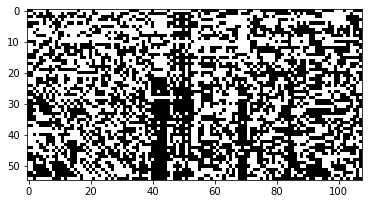

In [30]:
print("Label of this digit is:", y_test[index])
plt.imshow(X_test[index,:,:,0], cmap=plt.cm.binary)